In [5]:
import boto3
import pandas as pd
from io import StringIO

# S3 bucket and key
bucket = 'cloud-team3'
key = 'bank-additional/data/bank-additional-full.csv'

# Initialize S3 client
s3 = boto3.client('s3')

# Download and decode
response = s3.get_object(Bucket=bucket, Key=key)
body = response['Body'].read().decode('utf-8')

# Load into DataFrame
df = pd.read_csv(StringIO(body), sep=';')

# Preview
print(df.head())


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [6]:
# import boto3
# import pandas as pd
# from io import StringIO

# # S3 setup
# bucket = 'cloud-team3'
# key = 'bank-additional/bank-additional-full.csv'  # ✅ only the path inside the bucket


# # Download file content from S3
# s3 = boto3.client('s3')
# response = s3.get_object(Bucket=bucket, Key=key)
# body = response['Body'].read().decode('utf-8')

# # Load into pandas
# df = pd.read_csv(StringIO(body), sep=';')  # use sep=';' for semicolon CSV

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
binary_map = {'yes': 1, 'no': 0}
df['default'] = df['default'].map(binary_map)
df['housing'] = df['housing'].map(binary_map)
df['loan'] = df['loan'].map(binary_map)
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# One-hot encode other categorical features
df = pd.get_dummies(df, columns=[
    'job', 'marital', 'education', 'contact', 
    'month', 'day_of_week', 'poutcome'
], drop_first=True)


In [10]:
df.head()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,0.0,0.0,0.0,261,1,999,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False
1,57,NaN,0.0,0.0,149,1,999,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False
2,37,0.0,1.0,0.0,226,1,999,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False
3,40,0.0,0.0,0.0,151,1,999,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False
4,56,0.0,0.0,1.0,307,1,999,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   default                        32591 non-null  float64
 2   housing                        40198 non-null  float64
 3   loan                           40198 non-null  float64
 4   duration                       41188 non-null  int64  
 5   campaign                       41188 non-null  int64  
 6   pdays                          41188 non-null  int64  
 7   previous                       41188 non-null  int64  
 8   emp.var.rate                   41188 non-null  float64
 9   cons.price.idx                 41188 non-null  float64
 10  cons.conf.idx                  41188 non-null  float64
 11  euribor3m                      41188 non-null  float64
 12  nr.employed                    41188 non-null 

In [12]:
df['default'].unique()

array([ 0., nan,  1.])

In [13]:
df['y'].unique()

array([0, 1])

In [14]:
df.head()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,0.0,0.0,0.0,261,1,999,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False
1,57,NaN,0.0,0.0,149,1,999,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False
2,37,0.0,1.0,0.0,226,1,999,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False
3,40,0.0,0.0,0.0,151,1,999,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False
4,56,0.0,0.0,1.0,307,1,999,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False


In [15]:
df['emp.var.rate'].unique()

array([ 1.1,  1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3. , -1.7, -1.1])

In [16]:
df['cons.price.idx'].unique()

array([93.994, 94.465, 93.918, 93.444, 93.798, 93.2  , 92.756, 92.843,
       93.075, 92.893, 92.963, 92.469, 92.201, 92.379, 92.431, 92.649,
       92.713, 93.369, 93.749, 93.876, 94.055, 94.215, 94.027, 94.199,
       94.601, 94.767])

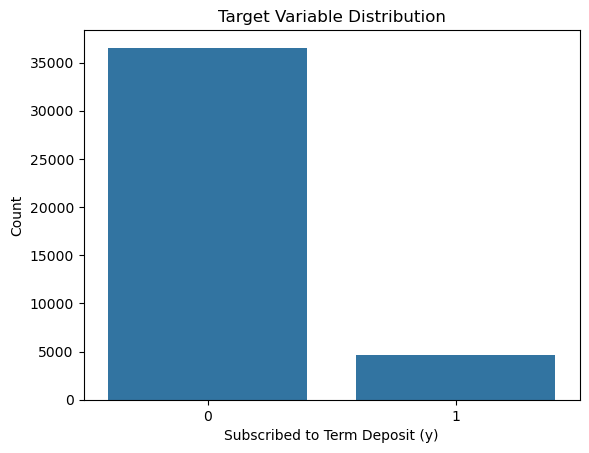

y
0    0.887346
1    0.112654
Name: proportion, dtype: float64


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='y', data=df)
plt.title('Target Variable Distribution')
plt.xlabel('Subscribed to Term Deposit (y)')
plt.ylabel('Count')
plt.show()

print(df['y'].value_counts(normalize=True))  # Class imbalance check


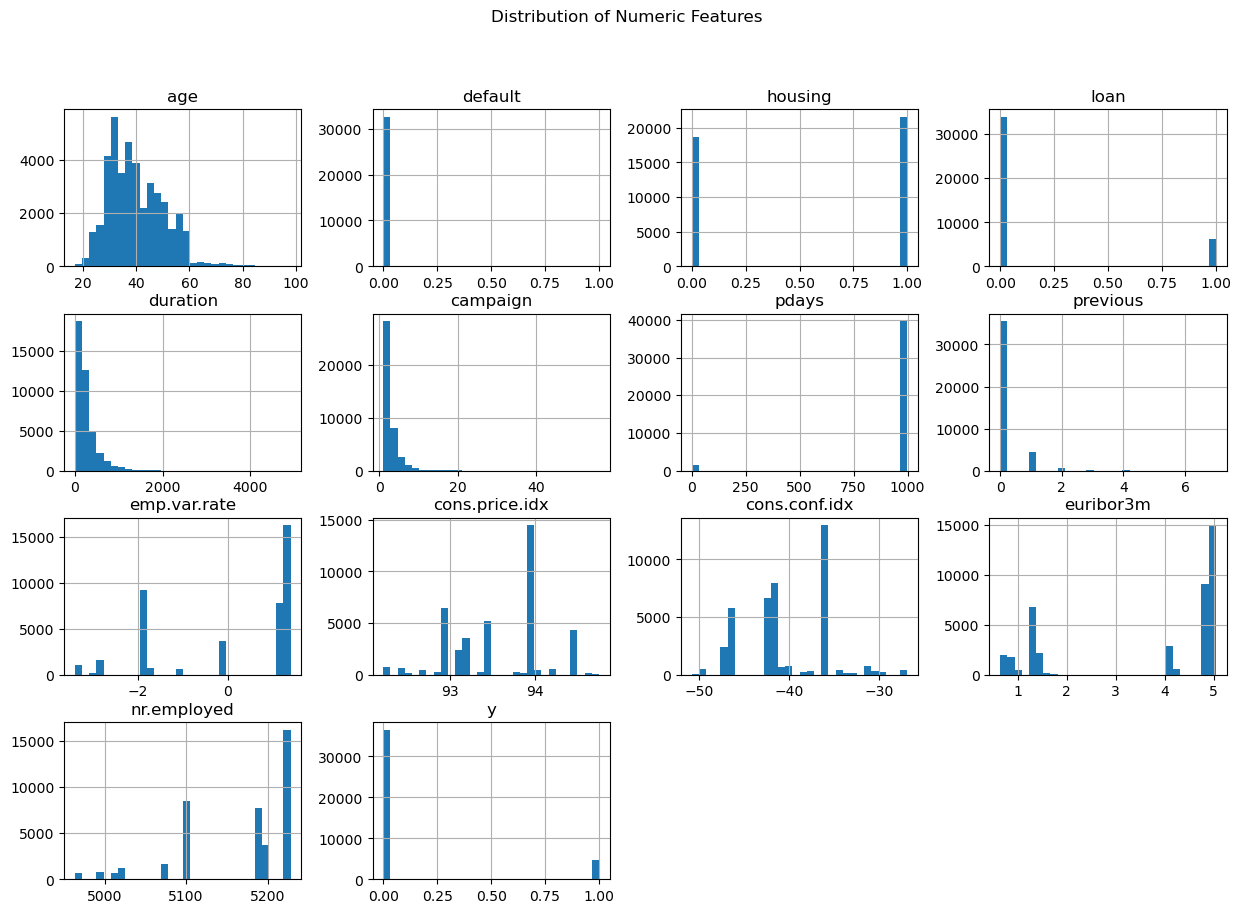

In [18]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

df[numeric_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of Numeric Features')
plt.show()


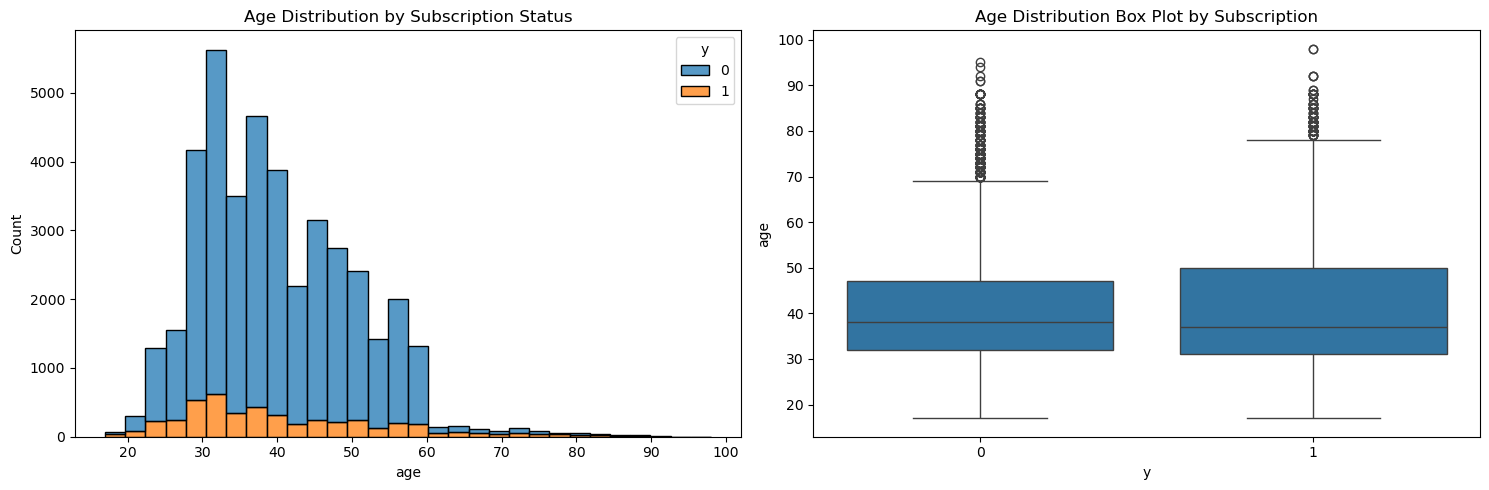


Age statistics by subscription status:
     count       mean        std   min   25%   50%   75%   max
y                                                             
0  36548.0  39.911185   9.898132  17.0  32.0  38.0  47.0  95.0
1   4640.0  40.913147  13.837476  17.0  31.0  37.0  50.0  98.0


In [19]:
# Age distribution by subscription status
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='age', hue='y', multiple="stack", bins=30)
plt.title('Age Distribution by Subscription Status')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='y', y='age')
plt.title('Age Distribution Box Plot by Subscription')

plt.tight_layout()
plt.show()

# Age statistics by subscription
print('\nAge statistics by subscription status:')
print(df.groupby('y')['age'].describe())

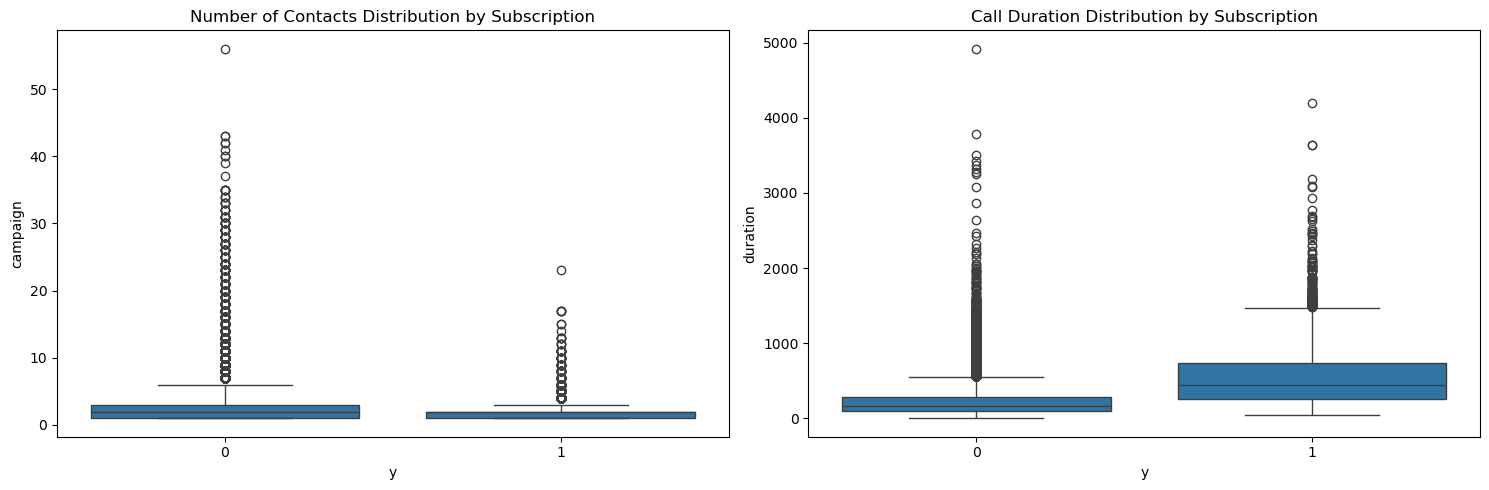


Campaign contact statistics by subscription status:
     count      mean       std  min  25%  50%  75%   max
y                                                       
0  36548.0  2.633085  2.873438  1.0  1.0  2.0  3.0  56.0
1   4640.0  2.051724  1.666245  1.0  1.0  2.0  2.0  23.0


In [20]:
# Analysis of campaign contacts
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='y', y='campaign')
plt.title('Number of Contacts Distribution by Subscription')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='y', y='duration')
plt.title('Call Duration Distribution by Subscription')

plt.tight_layout()
plt.show()

# Campaign statistics
print('\nCampaign contact statistics by subscription status:')
print(df.groupby('y')['campaign'].describe())

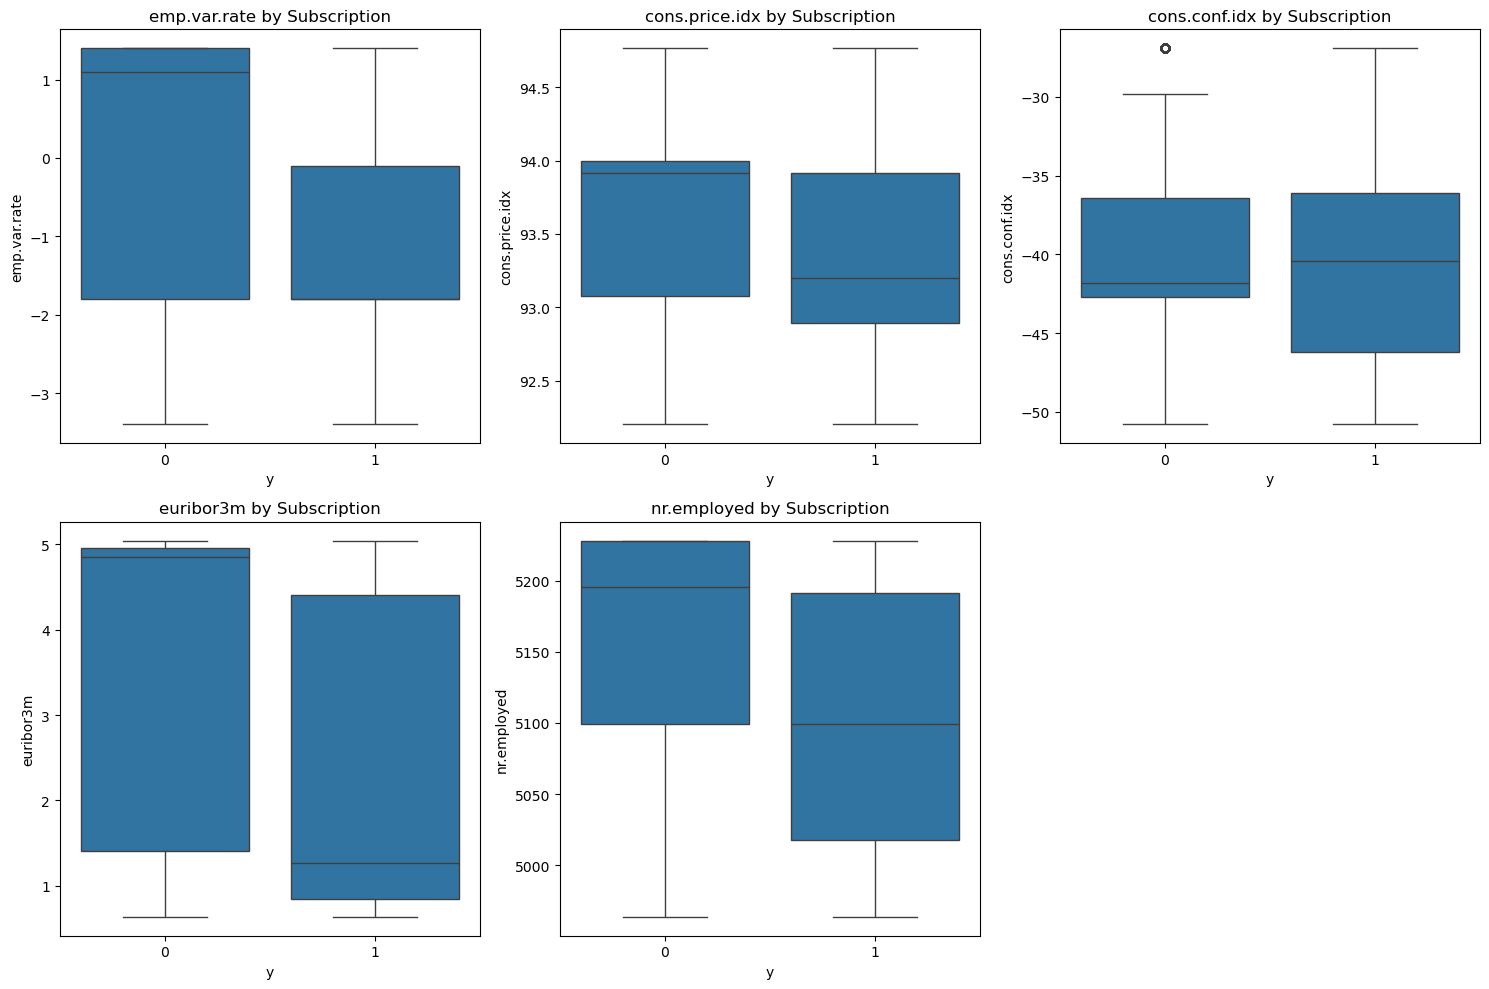

In [21]:
# Economic indicators correlation with subscription
economic_vars = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

plt.figure(figsize=(15, 10))
for i, var in enumerate(economic_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='y', y=var)
    plt.title(f'{var} by Subscription')

plt.tight_layout()
plt.show()

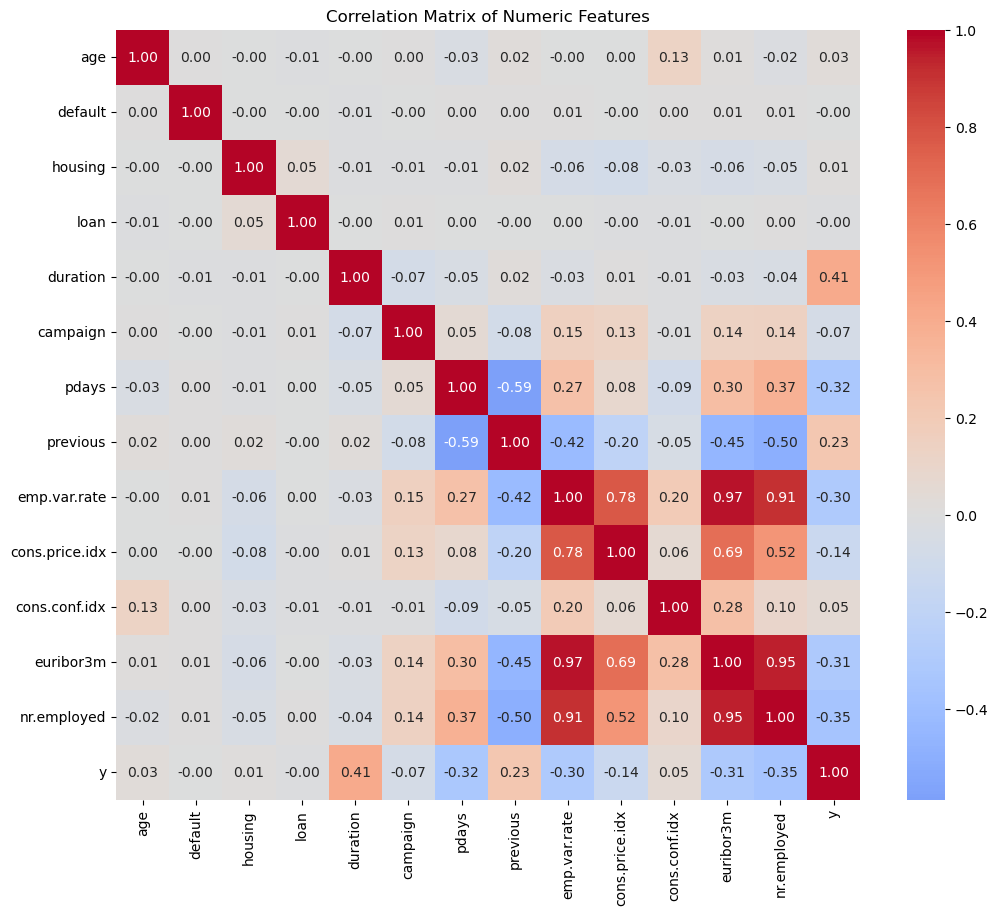


Feature correlations with subscription (target):
y                 1.000000
duration          0.405274
previous          0.230181
cons.conf.idx     0.054878
age               0.030399
housing           0.011662
default          -0.003689
loan             -0.004682
campaign         -0.066357
cons.price.idx   -0.136211
emp.var.rate     -0.298334
euribor3m        -0.307771
pdays            -0.324914
nr.employed      -0.354678
Name: y, dtype: float64


In [22]:
# Select numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Print correlations with target variable
print('\nFeature correlations with subscription (target):')
correlations_with_target = correlation_matrix['y'].sort_values(ascending=False)
print(correlations_with_target)

In [23]:
df = df.drop(columns=['default'])

In [24]:
df = df.fillna(df.mean(numeric_only=True))

In [25]:
df.drop('y', axis=1).columns

Index(['age', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [26]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop('y', axis=1)
y = df['y']

# Split before SMOTE to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Print new class balance
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: y
0    29238
1     3712
Name: count, dtype: int64
After SMOTE: y
0    29238
1    29238
Name: count, dtype: int64


In [35]:
import os
import pandas as pd
if not os.path.exists('data'):
    os.makedirs('data')

# Save training data
pd.DataFrame(X_train_res).to_csv('data/X_train_res.csv', index=False)
pd.DataFrame(y_train_res, columns=['y']).to_csv('data/y_train_res.csv', index=False)

# Save test data
pd.DataFrame(X_test).to_csv('data/X_test.csv', index=False)
pd.DataFrame(y_test, columns=['y']).to_csv('data/y_test.csv', index=False)

# Save the original dataframe before preprocessing if available
if 'df' in locals() or 'df' in globals():
    df.to_csv('data/original_data.csv', index=False)

print("Saved the following files in 'data' directory:")
print("- Training data: X_train_res.csv, y_train_res.csv")
print("- Test data: X_test.csv, y_test.csv")
if 'df' in locals() or 'df' in globals():
    print("- Original data: original_data.csv")

Saved the following files in 'data' directory:
- Training data: X_train_res.csv, y_train_res.csv
- Test data: X_test.csv, y_test.csv
- Original data: original_data.csv


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import xgboost as xgb

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

for name, model in models.items():
    print(f"--- {name} ---")
    model.fit(X_train_res, y_train_res)  # Train on resampled data
    y_pred = model.predict(X_test)       # Test on original test set
    y_proba = model.predict_proba(X_test)[:, 1]

    print("ROC AUC:", roc_auc_score(y_test, y_proba))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print()


--- Logistic Regression ---


/Users/apple/miniforge3/envs/clouda2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC AUC: 0.9069559590075003
Confusion Matrix:
 [[6879  431]
 [ 381  547]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      7310
           1       0.56      0.59      0.57       928

    accuracy                           0.90      8238
   macro avg       0.75      0.77      0.76      8238
weighted avg       0.90      0.90      0.90      8238


--- Random Forest ---
ROC AUC: 0.9459542608141893
Confusion Matrix:
 [[6984  326]
 [ 381  547]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      7310
           1       0.63      0.59      0.61       928

    accuracy                           0.91      8238
   macro avg       0.79      0.77      0.78      8238
weighted avg       0.91      0.91      0.91      8238


--- XGBoost ---


/Users/apple/miniforge3/envs/clouda2/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:47:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


ROC AUC: 0.9494114551393934
Confusion Matrix:
 [[6994  316]
 [ 365  563]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      7310
           1       0.64      0.61      0.62       928

    accuracy                           0.92      8238
   macro avg       0.80      0.78      0.79      8238
weighted avg       0.92      0.92      0.92      8238




In [27]:
import pickle
import os

# Create models directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

# Save each model
for name, model in models.items():
    # Convert spaces to underscores and make lowercase for filename
    filename = name.lower().replace(' ', '_')
    model_path = os.path.join('models', f'{filename}.pkl')
    
    with open(model_path, 'wb') as f:
        pickle.dump(model, f)
    print(f'Saved {name} to {model_path}')

print('\nAll models have been saved successfully!')

Saved Logistic Regression to models/logistic_regression.pkl
Saved Random Forest to models/random_forest.pkl
Saved XGBoost to models/xgboost.pkl

All models have been saved successfully!
